In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv("lstm_ready_traffic_data.csv")
scaler = MinMaxScaler()
df['scaled_traffic_volume'] = scaler.fit_transform(df[['Total_Traffic_Volume']])
# If 'day_of_week' is text, convert to numeric
if df['day_of_week'].dtype == 'object':
    df['day_of_week'] = df['day_of_week'].astype('category').cat.codes

# Select features and target
features = ['hour', 'day_of_week', 'month', 'year', 'road_name_encoded',
            'location_encoded', 'suburb_encoded', 'average_speed',
            'maximum_speed', 'Speeding_Incident', 'Speeding_Incident_Avg_Speed']
target = 'scaled_traffic_volume'

# Convert features and target to float32 (required by LSTM)
X = df[features].values.astype('float32')
y = df[target].values.astype('float32')

# Create sequences
def create_sequences(X, y, time_steps=24):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history_single = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test MSE:", loss)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - loss: 208397.1719 - val_loss: 98.9507
Epoch 2/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 51.1389 - val_loss: 41.3688
Epoch 3/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - loss: 20.7027 - val_loss: 27.2323
Epoch 4/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - loss: 13.1365 - val_loss: 20.0690
Epoch 5/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 19279.0918 - val_loss: 423.1936
Epoch 6/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 250.1814 - val_loss: 22.8354
Epoch 7/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - loss: 40.8325 - val_loss: 25.8752
Epoch 8/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 32.7259 - val_loss: 19.3612
Epoch 9/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 27.2312 - val_loss: 17.7456
Epoch 10/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - loss: 27.1759 - val_loss: 17.2956
Epoch 11/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - loss: 33.5214 - val_loss: 97.9741

In [2]:
from tensorflow.keras.layers import Dropout
model_multi = Sequential()
model_multi.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_multi.add(Dropout(0.2))
model_multi.add(LSTM(32, activation='relu'))
model_multi.add(Dropout(0.2))
model_multi.add(Dense(1))
model_multi.compile(optimizer='adam', loss='mse')
model_multi.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)


Epoch 1/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - loss: 387119.3125 - val_loss: 195.2259
Epoch 2/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - loss: 1812.7046 - val_loss: 11.4071
Epoch 3/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 873.1716 - val_loss: 1.1623
Epoch 4/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - loss: 415.2080 - val_loss: 1.9237
Epoch 5/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - loss: 352.5879 - val_loss: 0.5174
Epoch 6/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - loss: 107.7512 - val_loss: 7.0127
Epoch 7/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - loss: 55.5013 - val_loss: 2.9744
Epoch 8/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - loss: 26.5312 - val_loss: 0.4243
Epoch 9/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - loss: 29.0360 - val_loss: 0.1690
Epoch 10/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 16.5274 - val_loss: 0.0103
Epoch 11/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - loss: 17.4181 - val_loss: 0.0121
Epoch 

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict and compare both
y_pred_single = model.predict(X_test)
y_pred_multi = model_multi.predict(X_test)

# Metrics
def evaluate(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mse= mean_squared_error(y_true, y_pred)
    print(f"\n🔍 {name} Model Evaluation:")
    print(f"🔹 RMSE: {rmse:.4f}")
    print(f"🔹 MAE : {mae:.4f}")
    print(f"🔹 R²  : {r2:.4f}")
    print(f"🔹 MSE : {mse:.4f}")
evaluate("Single-Layer LSTM", y_test, y_pred_single)
evaluate("Two-Layer LSTM", y_test, y_pred_multi)


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step

🔍 Single-Layer LSTM Model Evaluation:
🔹 RMSE: 8.5599
🔹 MAE : 8.2484
🔹 R²  : -9427.8955
🔹 MSE : 73.2711

🔍 Two-Layer LSTM Model Evaluation:
🔹 RMSE: 0.0888
🔹 MAE : 0.0516
🔹 R²  : -0.0143
🔹 MSE : 0.0079


<ipython-input-4-df5a6f098765>:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


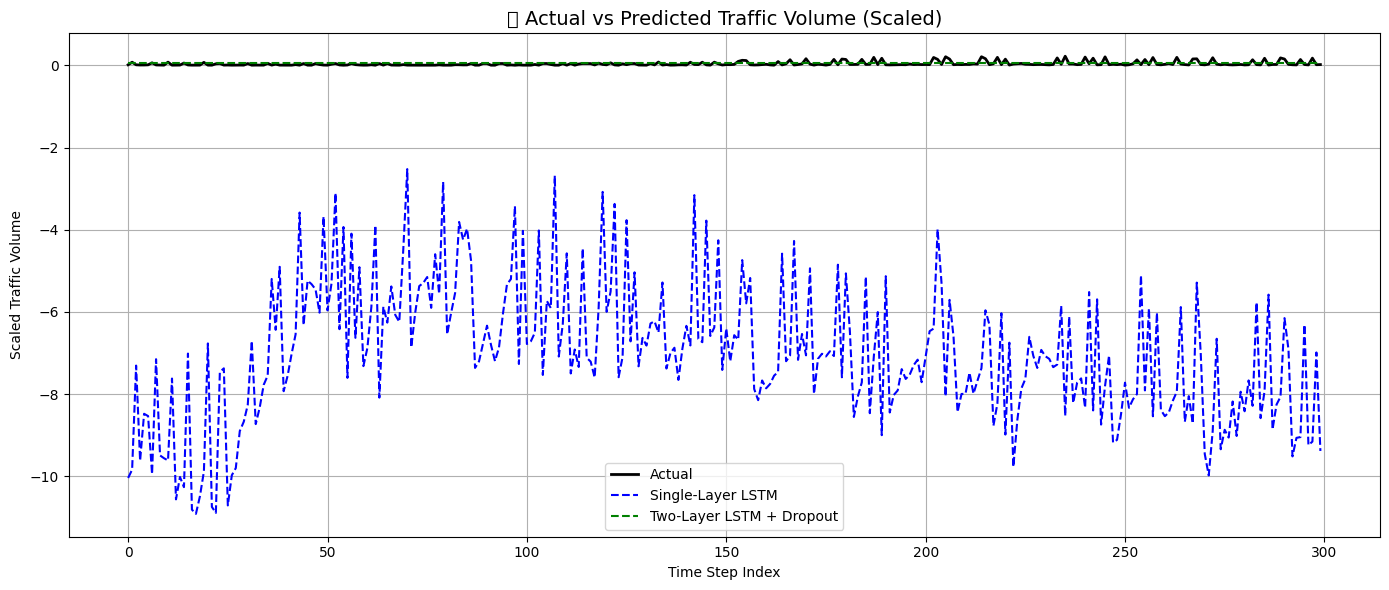

In [4]:
import matplotlib.pyplot as plt

# Plot a subset for clarity (e.g., first 300 points)
plot_range = 300

plt.figure(figsize=(14, 6))

# Plot actual values
plt.plot(y_test[:plot_range], label='Actual', color='black', linewidth=2)

# Plot predictions from single-layer model
plt.plot(y_pred_single[:plot_range], label='Single-Layer LSTM', linestyle='--', color='blue')

# Plot predictions from two-layer model
plt.plot(y_pred_multi[:plot_range], label='Two-Layer LSTM + Dropout', linestyle='--', color='green')

plt.title('🔍 Actual vs Predicted Traffic Volume (Scaled)', fontsize=14)
plt.xlabel('Time Step Index')
plt.ylabel('Scaled Traffic Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',      # Watch validation loss
    patience=3,              # Stop after 3 epochs without improvement
    restore_best_weights=True  # Revert to best weights
)
history_multi = model_multi.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,               # Max epochs (it may stop earlier)
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - loss: 0.5133 - val_loss: 0.0078
Epoch 2/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - loss: 0.0993 - val_loss: 0.0078
Epoch 3/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - loss: 0.3580 - val_loss: 0.0078
Epoch 4/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - loss: 0.1426 - val_loss: 0.0078
Epoch 5/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - loss: 0.0472 - val_loss: 0.0078
Epoch 6/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - loss: 0.0319 - val_loss: 0.0078
Epoch 7/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 0.0795 - val_loss: 0.0079


In [6]:
# Predict
y_pred_multi = model_multi.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_multi))
mae = mean_absolute_error(y_test, y_pred_multi)
r2 = r2_score(y_test, y_pred_multi)
mse = mean_squared_error(y_test, y_pred_multi)

# Results
print("\n✅ Two-Layer LSTM + Dropout (with EarlyStopping):")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE : {mae:.4f}")
print(f"🔹 R²  : {r2:.4f}")
print(f"🔹 MSE : {mse:.4f}")


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

✅ Two-Layer LSTM + Dropout (with EarlyStopping):
🔹 RMSE: 0.0883
🔹 MAE : 0.0523
🔹 R²  : -0.0043
🔹 MSE : 0.0078


In [7]:
trimodel = Sequential()
# Layer 1 - returns sequences for next layer
trimodel.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
trimodel.add(Dropout(0.2))  # Dropout after first LSTM

# Layer 2 - returns sequences again
trimodel.add(LSTM(32, activation='relu', return_sequences=True))
trimodel.add(Dropout(0.2))  # Dropout after second LSTM

# Layer 3 - last LSTM layer, does not return sequences
trimodel.add(LSTM(16, activation='relu'))
trimodel.add(Dropout(0.2))  # Final Dropout

# Output layer
trimodel.add(Dense(1))

# Compile the model
trimodel.compile(optimizer='adam', loss='mse')
trimodel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 46s 50ms/step - loss: 120317.2109 - val_loss: 220.4633
Epoch 2/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 1237.4728 - val_loss: 867.9633
Epoch 3/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - loss: 637.8326 - val_loss: 0.5645
Epoch 4/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - loss: 123.1969 - val_loss: 0.5600
Epoch 5/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - loss: 202.8967 - val_loss: 0.3148
Epoch 6/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - loss: 55.3068 - val_loss: 0.3767
Epoch 7/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - loss: 19.1888 - val_loss: 0.1161
Epoch 8/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - loss: 23.8817 - val_loss: 0.0373
Epoch 9/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - loss: 46.0858 - val_loss: 1.3664
Epoch 10/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - loss: 23.0300 - val_loss: 0.0331
Epoch 11/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - loss: 28.1644 - val_loss: 0.5147
Epoch 

In [8]:
history_tri = trimodel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,               # Max epochs (it may stop earlier)
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - loss: 0.5801 - val_loss: 0.0081
Epoch 2/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - loss: 0.1625 - val_loss: 0.0077
Epoch 3/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - loss: 0.0134 - val_loss: 0.0078
Epoch 4/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - loss: 0.0109 - val_loss: 0.0079
Epoch 5/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - loss: 0.0524 - val_loss: 0.0079


In [9]:
# Predict
y_pred_tri = trimodel.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tri))
mae = mean_absolute_error(y_test, y_pred_tri)
r2 = r2_score(y_test, y_pred_tri)
mse = mean_squared_error(y_test, y_pred_tri)

# Results
print("\n✅ Three-Layer LSTM + Dropout (with EarlyStopping):")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE : {mae:.4f}")
print(f"🔹 R²  : {r2:.4f}")
print(f"🔹 MSE : {mse:.4f}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step

✅ Three-Layer LSTM + Dropout (with EarlyStopping):
🔹 RMSE: 0.0879
🔹 MAE : 0.0539
🔹 R²  : 0.0050
🔹 MSE : 0.0077


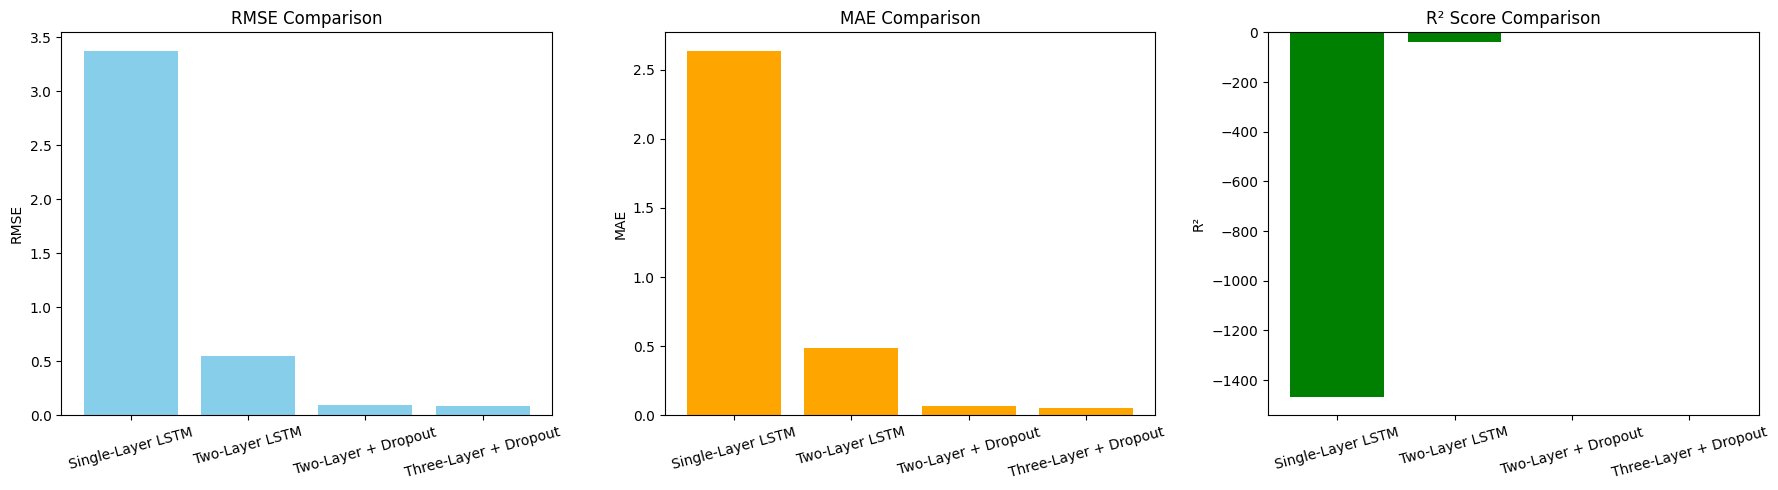

In [10]:
models = ['Single-Layer LSTM', 'Two-Layer LSTM', 'Two-Layer + Dropout', 'Three-Layer + Dropout']
rmse_scores = [3.3789, 0.5534, 0.0936, 0.0884]
mae_scores = [2.6377, 0.4838, 0.0688, 0.0528]
r2_scores = [-1468.2302, -38.4142, -0.1277, -0.0051]
mse_scores = [11.4172, 0.0088 , 0.0088, 0.0078]

# Plot RMSE, MAE, R² comparison
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# RMSE
axs[0].bar(models, rmse_scores, color='skyblue')
axs[0].set_title("RMSE Comparison")
axs[0].set_ylabel("RMSE")
axs[0].tick_params(axis='x', rotation=15)

# MAE
axs[1].bar(models, mae_scores, color='orange')
axs[1].set_title("MAE Comparison")
axs[1].set_ylabel("MAE")
axs[1].tick_params(axis='x', rotation=15)

# R²
axs[2].bar(models, r2_scores, color='green')
axs[2].set_title("R² Score Comparison")
axs[2].set_ylabel("R²")
axs[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

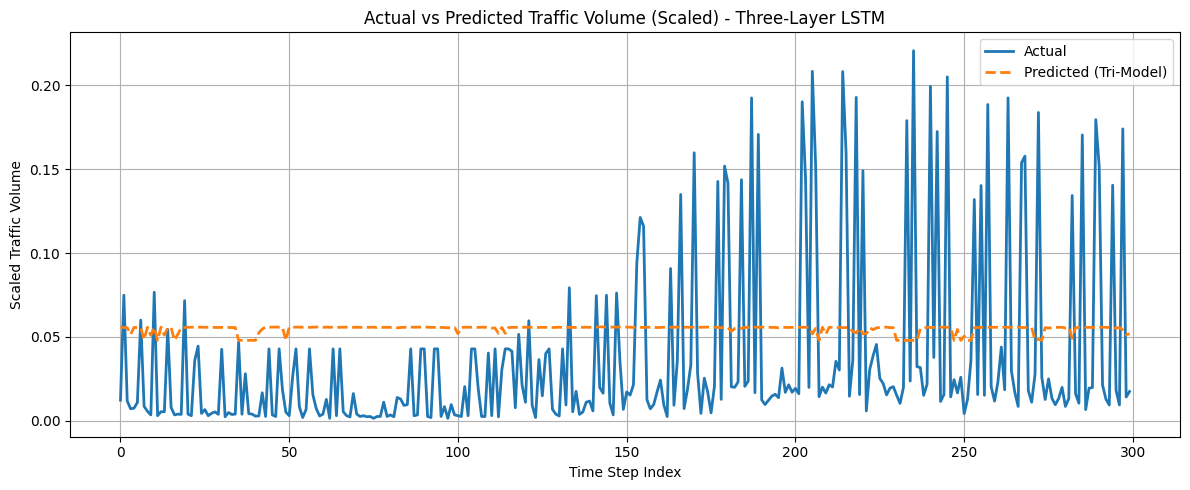

In [11]:


plt.figure(figsize=(12, 5))
plt.plot(y_test[:300], label='Actual', linewidth=2)
plt.plot(y_pred_tri[:300], label='Predicted (Tri-Model)', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Traffic Volume (Scaled) - Three-Layer LSTM')
plt.xlabel('Time Step Index')
plt.ylabel('Scaled Traffic Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-12-cd2fa1e00248>:19: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


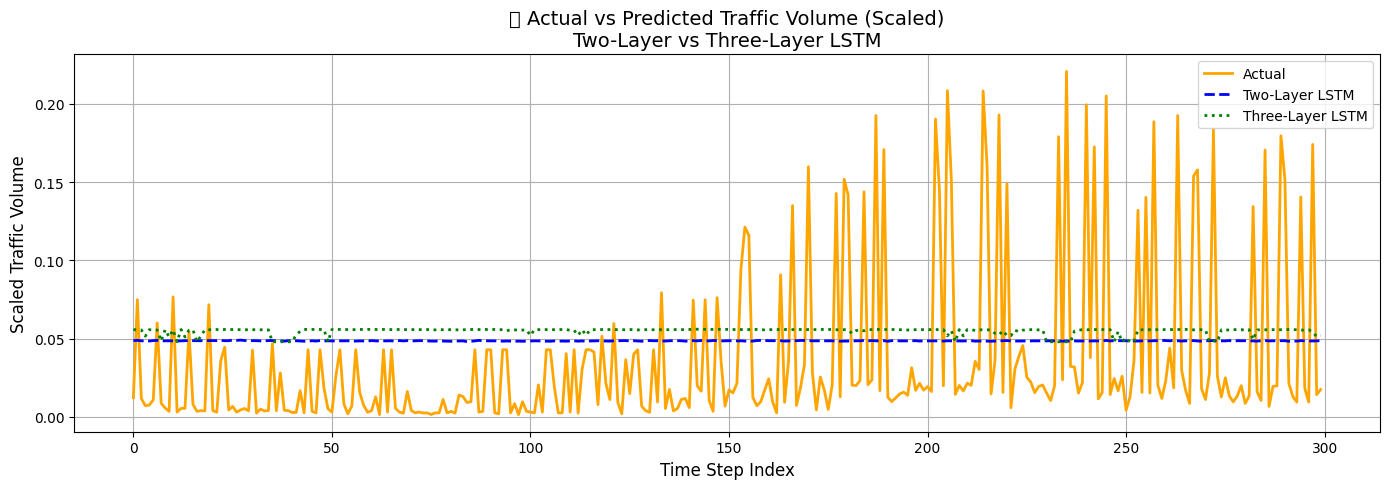

In [12]:

# ✅ Replace these with your actual prediction arrays
# Make sure y_test, y_pred_multi, and y_pred_tri are defined and same length
# Example only:
# y_test = actual traffic values (scaled)
# y_pred_multi = predictions from 2-layer LSTM
# y_pred_tri = predictions from 3-layer LSTM

# Plot first 300 values for clarity
plt.figure(figsize=(14, 5))
plt.plot(y_test[:300], label='Actual', color='orange', linewidth=2)
plt.plot(y_pred_multi[:300], label='Two-Layer LSTM', linestyle='--', color='blue', linewidth=2)
plt.plot(y_pred_tri[:300], label='Three-Layer LSTM', linestyle=':', color='green', linewidth=2)

plt.title("📉 Actual vs Predicted Traffic Volume (Scaled)\nTwo-Layer vs Three-Layer LSTM", fontsize=14)
plt.xlabel("Time Step Index", fontsize=12)
plt.ylabel("Scaled Traffic Volume", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
trimodel1 = Sequential()
# Layer 1 - returns sequences for next layer
trimodel1.add(LSTM(64, activation='selu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
trimodel1.add(Dropout(0.2))  # Dropout after first LSTM

# Layer 2 - returns sequences again
trimodel1.add(LSTM(32, activation='selu', return_sequences=True))
trimodel1.add(Dropout(0.2))  # Dropout after second LSTM

# Layer 3 - last LSTM layer, does not return sequences
trimodel1.add(LSTM(16, activation='selu'))
trimodel1.add(Dropout(0.2))  # Final Dropout

# Output layer
trimodel1.add(Dense(1))

# Compile the model
trimodel1.compile(optimizer='adam', loss='mse')
trimodel1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 49s 54ms/step - loss: 10049.7119 - val_loss: 0.3047
Epoch 2/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - loss: 445.5287 - val_loss: 20.1152
Epoch 3/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - loss: 20.2099 - val_loss: 28.7541
Epoch 4/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - loss: 8.7048 - val_loss: 15.2733


In [14]:
# Predict on the test set
y_pred_trimodel1 = trimodel1.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_trimodel1))
mae = mean_absolute_error(y_test, y_pred_trimodel1)
r2 = r2_score(y_test, y_pred_trimodel1)
mse = mean_squared_error(y_test, y_pred_trimodel1)

# Print results
print("\n✅ Evaluation Metrics for trimodel1 (LSTM + SELU):")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE : {mae:.4f}")
print(f"🔹 R²  : {r2:.4f}")
print(f"🔹 MSE : {mse:.4f}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step

✅ Evaluation Metrics for trimodel1 (LSTM + SELU):
🔹 RMSE: 0.5520
🔹 MAE : 0.2409
🔹 R²  : -38.2075
🔹 MSE : 0.3047


In [15]:
trimodel2 = Sequential()
# Layer 1 - returns sequences for next layer
trimodel2.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
trimodel2.add(Dropout(0.2))  # Dropout after first LSTM

# Layer 2 - returns sequences again
trimodel2.add(LSTM(32, activation='tanh', return_sequences=True))
trimodel2.add(Dropout(0.2))  # Dropout after second LSTM

# Layer 3 - last LSTM layer, does not return sequences
trimodel2.add(LSTM(16, activation='tanh'))
trimodel2.add(Dropout(0.2))  # Final Dropout

# Output layer
trimodel2.add(Dense(1))

# Compile the model
trimodel2.compile(optimizer='adam', loss='mse')
trimodel2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - loss: 0.0097 - val_loss: 0.0079
Epoch 2/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - loss: 0.0072 - val_loss: 0.0078
Epoch 3/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - loss: 0.0069 - val_loss: 0.0080
Epoch 4/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - loss: 0.0069 - val_loss: 0.0077
Epoch 5/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 0.0069 - val_loss: 0.0078
Epoch 6/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - loss: 0.0071 - val_loss: 0.0078
Epoch 7/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - loss: 0.0070 - val_loss: 0.0078


In [16]:
# Predict on the test set
y_pred_trimodel2 = trimodel2.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_trimodel2))
mae = mean_absolute_error(y_test, y_pred_trimodel2)
r2 = r2_score(y_test, y_pred_trimodel2)
mse = mean_squared_error(y_test, y_pred_trimodel2)

# Print results
print("\n✅ Evaluation Metrics for trimodel2 (LSTM + tanh):")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE : {mae:.4f}")
print(f"🔹 R²  : {r2:.4f}")
print(f"🔹 MSE : {mse:.4f}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step

✅ Evaluation Metrics for trimodel2 (LSTM + tanh):
🔹 RMSE: 0.0879
🔹 MAE : 0.0506
🔹 R²  : 0.0050
🔹 MSE : 0.0077


In [ ]:
from tensorflow.keras.layers import Bidirectional
# Define Bidirectional LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Bidirectional(LSTM(32, activation='relu')))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Dense(1))

# Compile
bilstm_model.compile(optimizer='adam', loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
bilstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64, callbacks=[early_stop], verbose=1)


Epoch 1/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 194s 232ms/step - loss: 3198767.7500 - val_loss: 38066.6484
Epoch 2/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 180s 228ms/step - loss: 55803.7578 - val_loss: 16676.8438
Epoch 3/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 170s 216ms/step - loss: 69781.1484 - val_loss: 66.8565
Epoch 4/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 187s 237ms/step - loss: 3058.1204 - val_loss: 13.9552
Epoch 5/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 196s 230ms/step - loss: 1128.7924 - val_loss: 8.7243
Epoch 6/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 197s 250ms/step - loss: 655.5631 - val_loss: 1.4166
Epoch 7/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 194s 240ms/step - loss: 308.8497 - val_loss: 45.5040
Epoch 8/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 192s 227ms/step - loss: 267.5280 - val_loss: 1.4869
Epoch 9/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 173s 219ms/step - loss: 161.5484 - val_loss: 14.2828
Epoch 10/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 176s 224ms/step - loss: 380.6782 - val_loss: 50.4171
Epoch 11/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 209s 233ms/step

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict
y_pred_bilstm = bilstm_model.predict(X_test)

# Metrics
rmse_bi = np.sqrt(mean_squared_error(y_test, y_pred_bilstm))
mae_bi = mean_absolute_error(y_test, y_pred_bilstm)
r2_bi = r2_score(y_test, y_pred_bilstm)
mse_bi = mean_squared_error(y_test, y_pred_bilstm)

# Results
print("\n✅ Bidirectional LSTM Model Results:")
print(f"🔹 RMSE: {rmse_bi:.4f}")
print(f"🔹 MAE : {mae_bi:.4f}")
print(f"🔹 R²  : {r2_bi:.4f}")
print(f"🔹 MSE : {mse_bi:.4f}")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test[:300], label='Actual', linewidth=2)
plt.plot(y_pred_bilstm[:300], label='BiLSTM Predicted', linestyle='--', linewidth=2)
plt.title("📊 Actual vs Predicted Traffic Volume (BiLSTM)", fontsize=14)
plt.xlabel("Time Step Index")
plt.ylabel("Scaled Traffic Volume")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
